In [14]:
!pip install kagglehub --quiet

import kagglehub
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
# Download dataset
path = kagglehub.dataset_download("bhavikjikadara/dog-and-cat-classification-dataset")

print("Path to dataset files:", path)

# Explore folders inside the dataset
print("Contents:")
for item in os.listdir(path):
    print("-", item)
# Use the actual path from kagglehub
base_path = '/root/.cache/kagglehub/datasets/bhavikjikadara/dog-and-cat-classification-dataset/versions/1/PetImages'

cat_dir = os.path.join(base_path, 'Cat')
dog_dir = os.path.join(base_path, 'Dog')

image_size = (64, 64)
max_images = 1000  # Limit for quick training
X = []
y = []

# Load Cat images
for file in os.listdir(cat_dir)[:max_images]:
    try:
        img_path = os.path.join(cat_dir, file)
        img = Image.open(img_path).resize(image_size).convert('L')  # Grayscale
        X.append(np.array(img).flatten())
        y.append(0)  # Cat
    except:
        continue

# Load Dog images
for file in os.listdir(dog_dir)[:max_images]:
    try:
        img_path = os.path.join(dog_dir, file)
        img = Image.open(img_path).resize(image_size).convert('L')  # Grayscale
        X.append(np.array(img).flatten())
        y.append(1)  # Dog
    except:
        continue

X = np.array(X)
y = np.array(y)

print(f"Loaded {len(X)} total images.")
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train SVM
model = SVC(kernel='linear')  # Try 'rbf' or 'poly' for non-linear
model.fit(X_train, y_train)


Path to dataset files: /root/.cache/kagglehub/datasets/bhavikjikadara/dog-and-cat-classification-dataset/versions/1
Contents:
- PetImages
Loaded 2000 total images.


SVC(kernel='linear')

In [15]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["Cat", "Dog"]))


Accuracy: 0.5125
              precision    recall  f1-score   support

         Cat       0.51      0.57      0.54       199
         Dog       0.52      0.46      0.49       201

    accuracy                           0.51       400
   macro avg       0.51      0.51      0.51       400
weighted avg       0.51      0.51      0.51       400



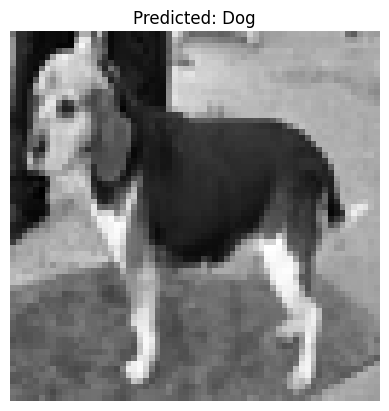

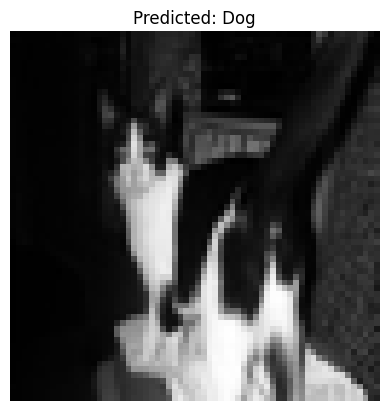

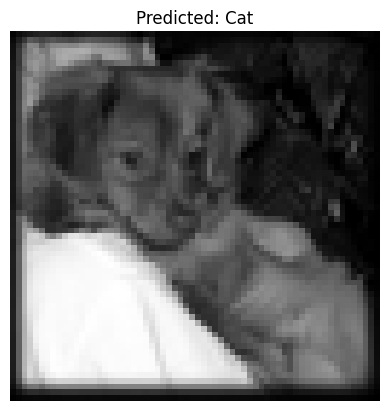

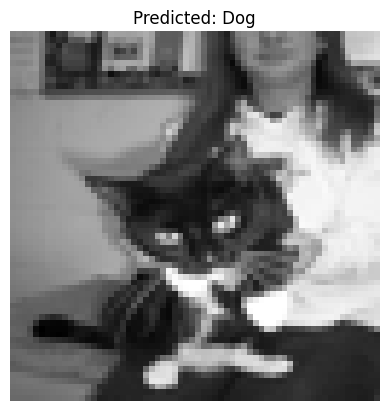

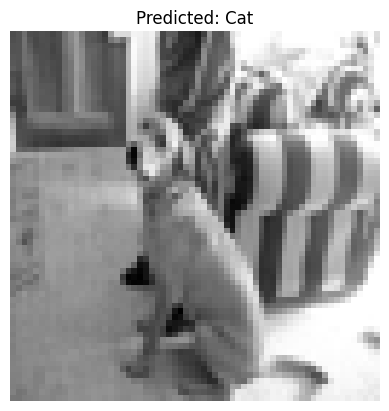

In [16]:
for i in range(5):
    plt.imshow(X_test[i].reshape(image_size), cmap='gray')
    plt.title(f"Predicted: {'Dog' if y_pred[i] else 'Cat'}")
    plt.axis('off')
    plt.show()
